In [22]:
import pandas as pd
from utils import seasonal_plot, plot_periodogram
import seaborn as sns

In [2]:
X_train = pd.read_csv('dataset/X_train.csv').set_index('DELIVERY_START')
X_train.index = pd.to_datetime(X_train.index, utc=True).tz_convert(None)
X_train.head()

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
DELIVERY_START,,,,,,,,,
2022-01-01 01:00:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,NaN
2022-01-01 02:00:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,NaN
2022-01-01 03:00:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,NaN
2022-01-01 04:00:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,NaN
2022-01-01 05:00:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,NaN


In [3]:
y_train = pd.read_csv('dataset/y_train.csv').set_index('DELIVERY_START')
y_train.index = pd.to_datetime(y_train.index, utc=True).tz_convert(None)
y_train.head()

,spot_id_delta
DELIVERY_START,
2022-01-01 01:00:00,-36.874770
2022-01-01 02:00:00,-12.643588
2022-01-01 03:00:00,-1.950193
2022-01-01 04:00:00,1.938272
2022-01-01 05:00:00,0.199907


### Plots

<Axes: xlabel='DELIVERY_START'>

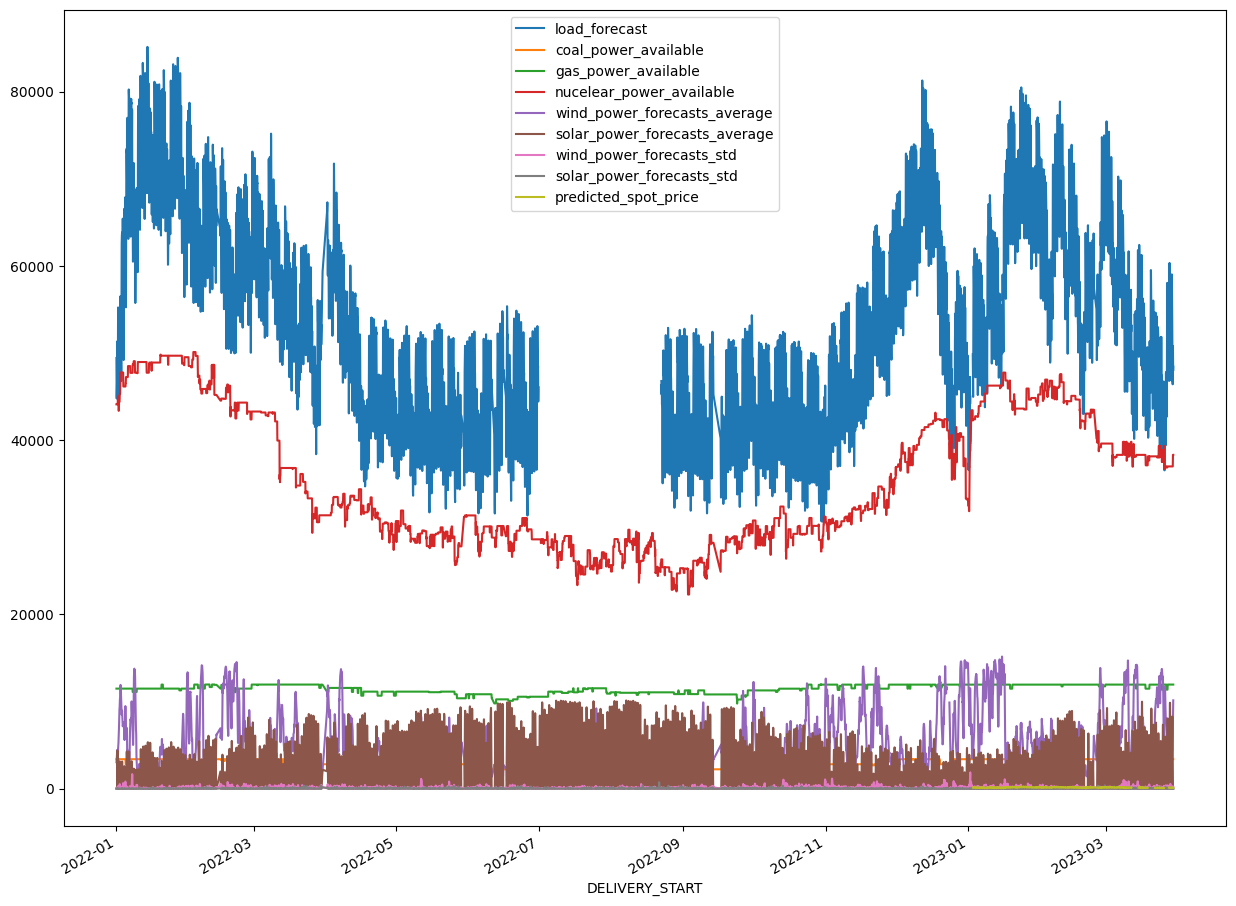

In [4]:
X_train.plot(figsize=(15,12))

array([[<Axes: xlabel='DELIVERY_START'>, <Axes: xlabel='DELIVERY_START'>,
        <Axes: xlabel='DELIVERY_START'>],
       [<Axes: xlabel='DELIVERY_START'>, <Axes: xlabel='DELIVERY_START'>,
        <Axes: xlabel='DELIVERY_START'>],
       [<Axes: xlabel='DELIVERY_START'>, <Axes: xlabel='DELIVERY_START'>,
        <Axes: xlabel='DELIVERY_START'>]], dtype=object)

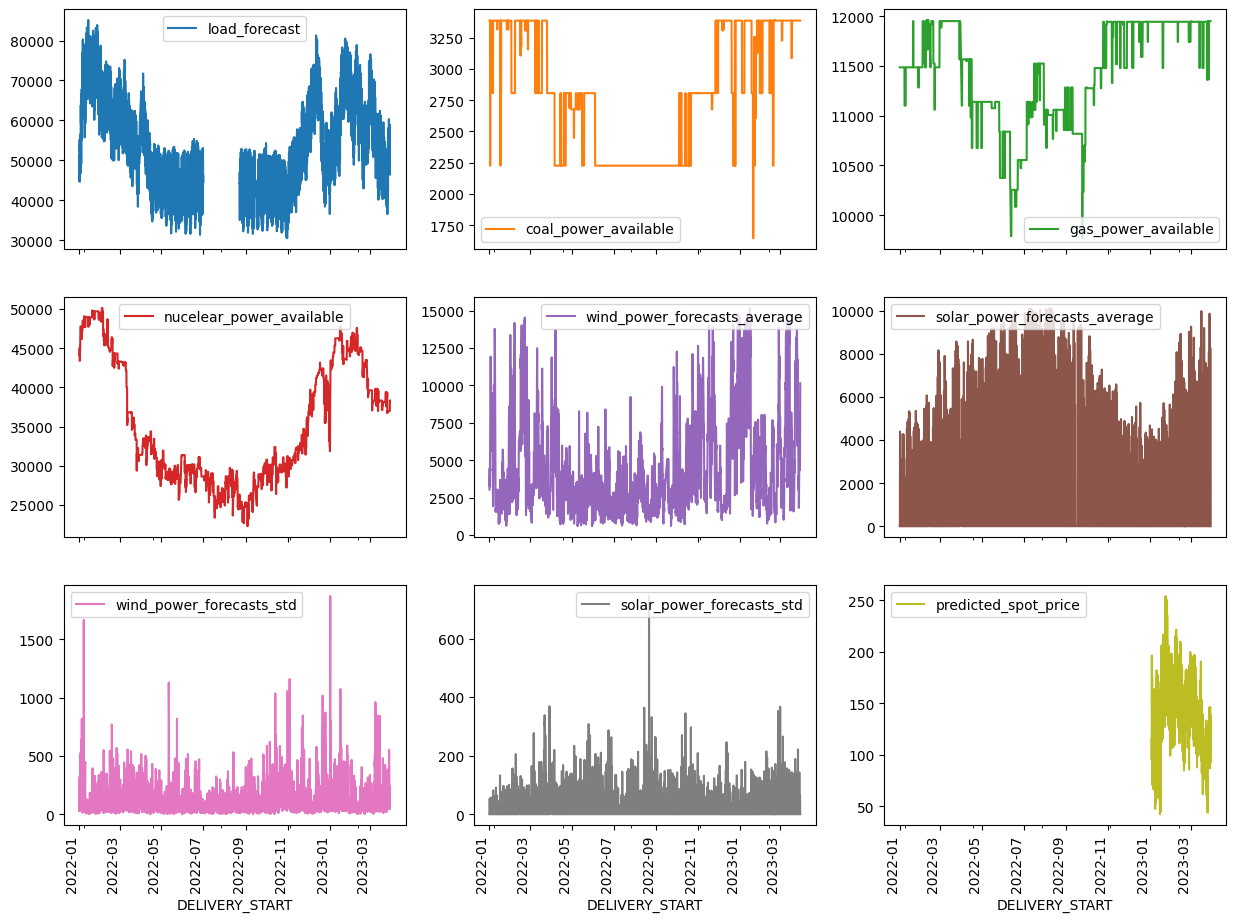

In [5]:
X_train.plot(subplots=True, layout=(3,3), figsize=(15,12), rot=90)

array([[<Axes: xlabel='DELIVERY_START'>],
       [<Axes: xlabel='DELIVERY_START'>],
       [<Axes: xlabel='DELIVERY_START'>],
       [<Axes: xlabel='DELIVERY_START'>]], dtype=object)

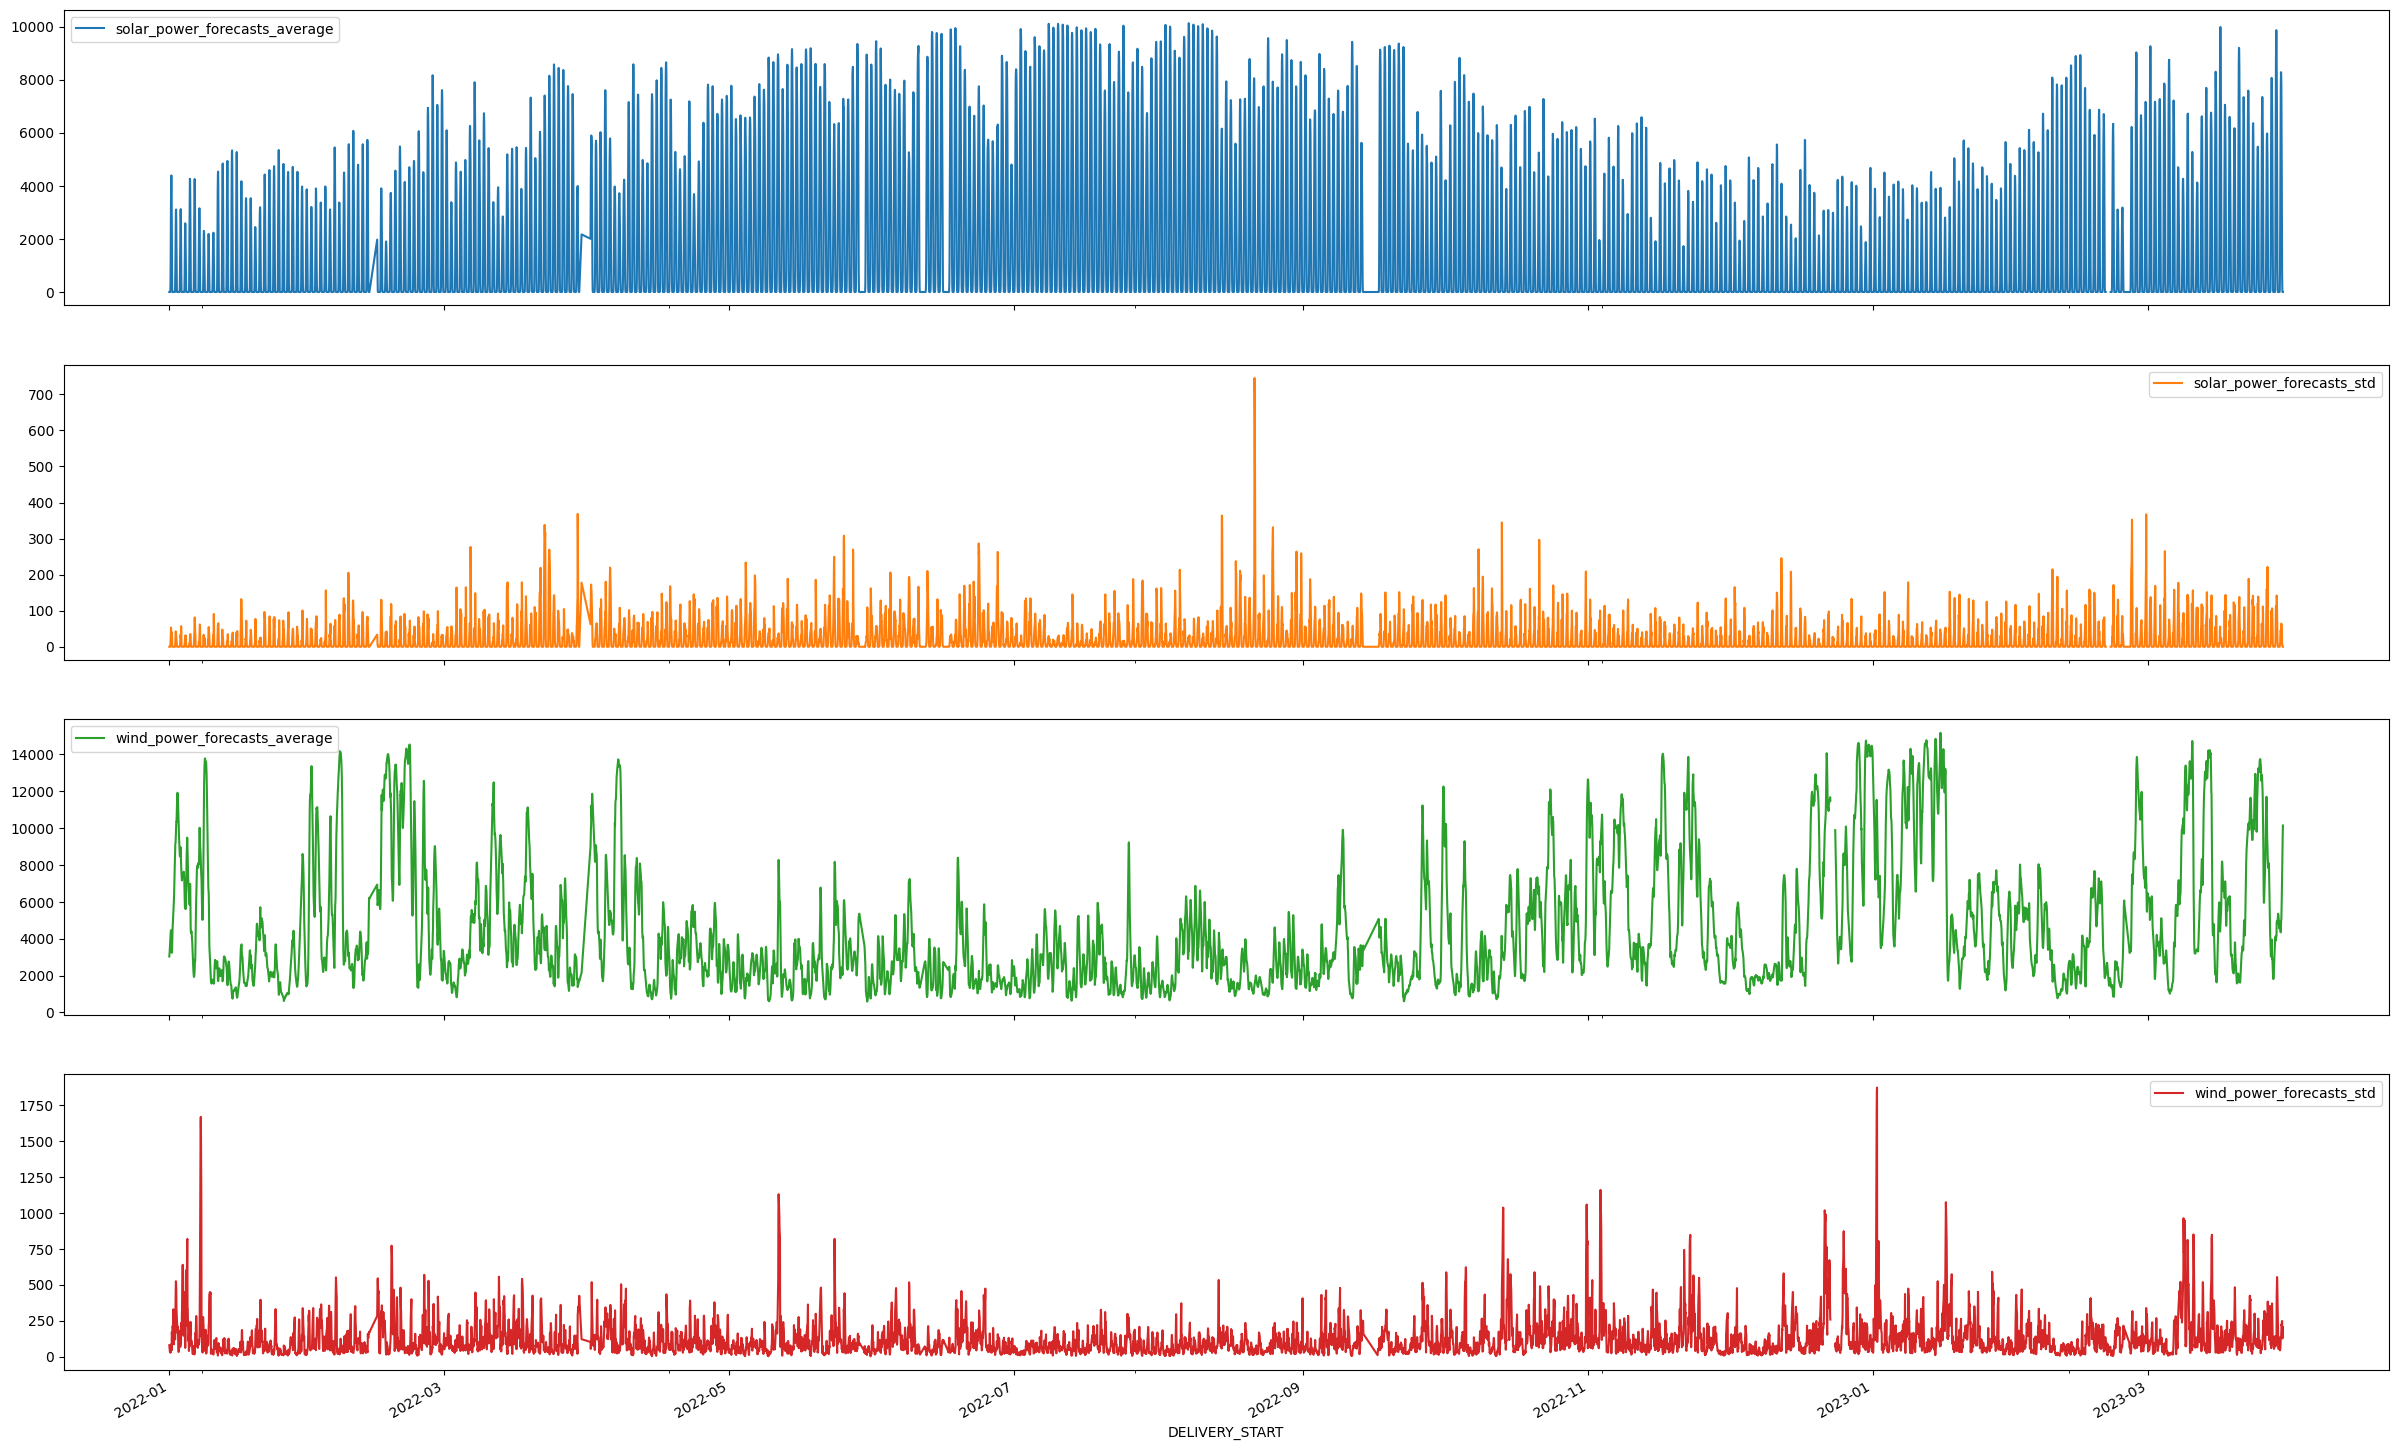

In [6]:
X_train[['solar_power_forecasts_average', 'solar_power_forecasts_std', 'wind_power_forecasts_average', 'wind_power_forecasts_std']].plot(subplots=True, layout=(4,1), sharex=True, figsize=(30,20))

<Axes: xlabel='DELIVERY_START'>

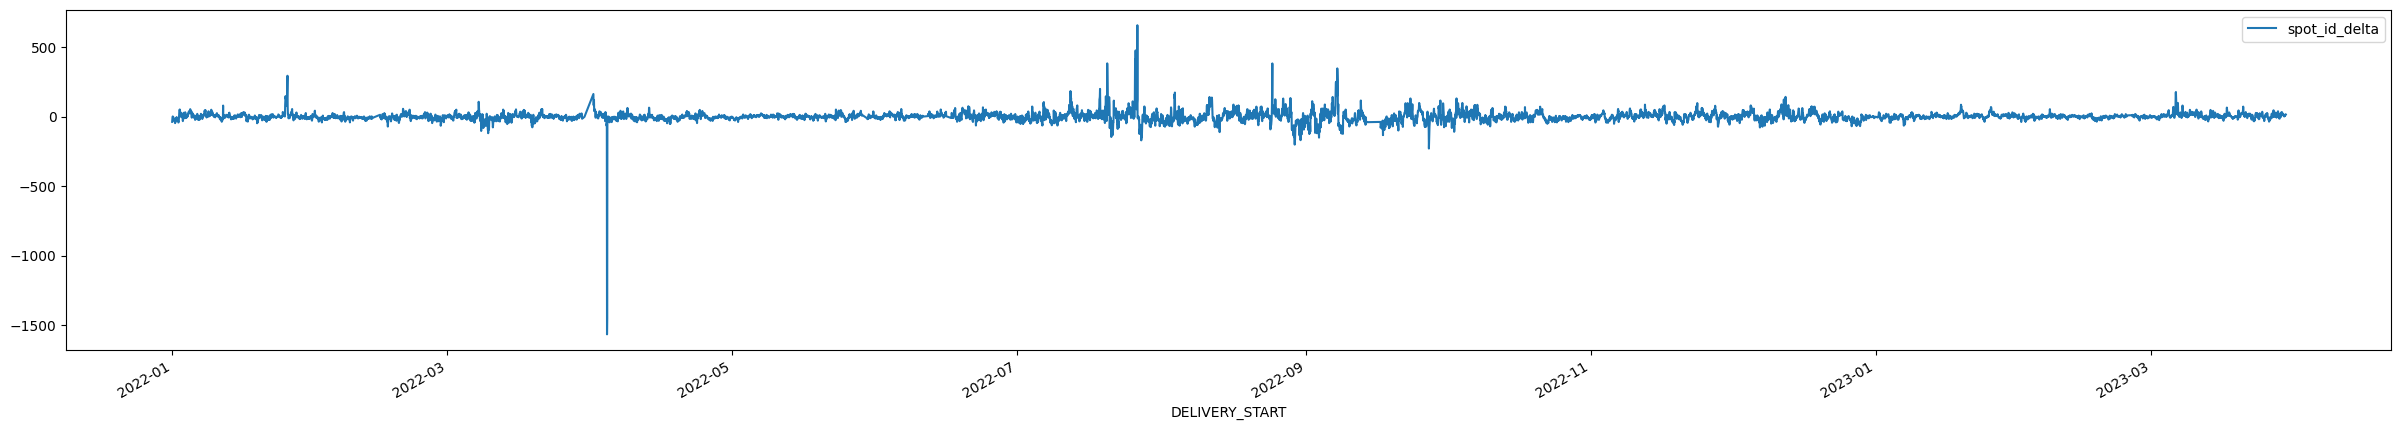

In [7]:
y_train.plot(figsize=(30,5))

array([[<Axes: title={'center': 'load_forecast'}>,
        <Axes: title={'center': 'coal_power_available'}>,
        <Axes: title={'center': 'gas_power_available'}>],
       [<Axes: title={'center': 'nucelear_power_available'}>,
        <Axes: title={'center': 'wind_power_forecasts_average'}>,
        <Axes: title={'center': 'solar_power_forecasts_average'}>],
       [<Axes: title={'center': 'wind_power_forecasts_std'}>,
        <Axes: title={'center': 'solar_power_forecasts_std'}>,
        <Axes: title={'center': 'predicted_spot_price'}>]], dtype=object)

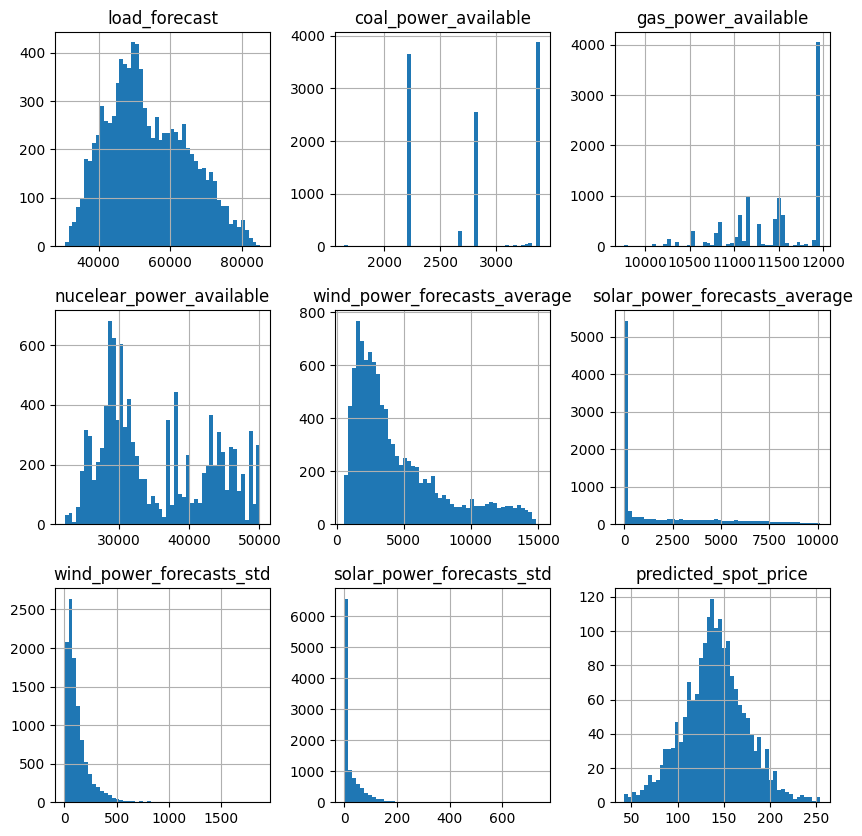

In [11]:
X_train.hist(figsize=(10, 10), bins=50)

array([[<Axes: title={'center': 'spot_id_delta'}>]], dtype=object)

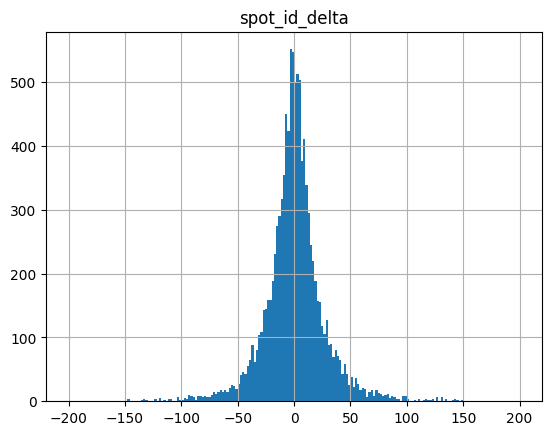

In [10]:
y_train.hist(bins=200, range=[-200,200])

<Axes: >

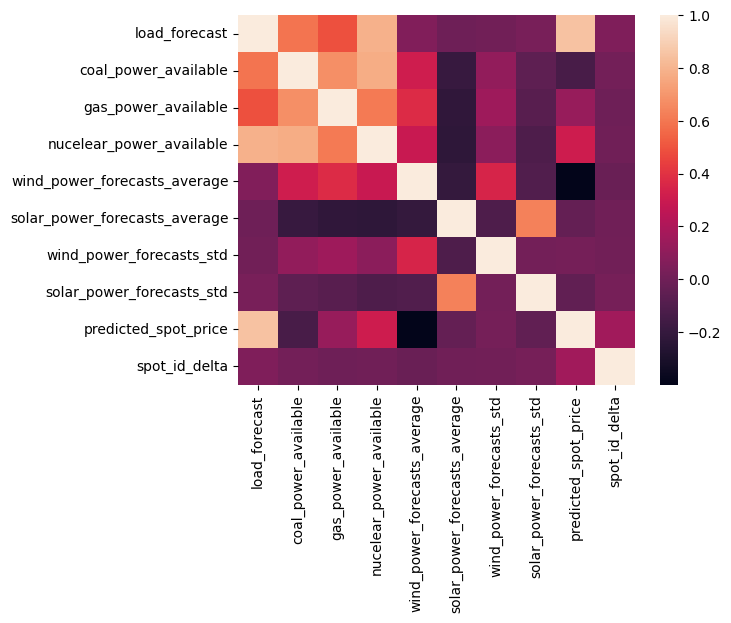

In [26]:
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr())

<Axes: xlabel='spot_id_delta'>

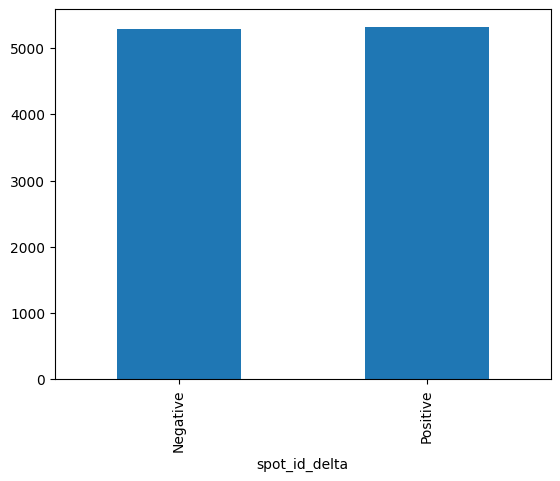

In [43]:
(y_train>0).replace({False: "Negative", True: "Positive"}).groupby('spot_id_delta')['spot_id_delta'].count().plot.bar()

Observations:
- load_forecast feature has missing data, high correlation with nucelear_power_available, clear seasonality
- predicted_spot_price has a lot of missing values
- question: is there seasonality in solar_power_forecasts_average and solar_power_forecasts_std?
- y_train has an outlier value
- y_train has low corr to all features
- y_train is roughly gaussian, balanced number of positive and negative values

### EDA

In [12]:
X_train.describe()

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
count,9318.000000,10604.000000,10604.000000,10604.000000,10581.000000,10581.000000,10581.000000,10581.000000,1846.000000
mean,53725.132968,2819.781592,11463.220671,35393.282252,4512.989415,1919.281353,125.399422,24.997384,140.256024
std,11274.194929,495.103588,483.799154,7619.820162,3349.419356,2706.963383,132.152875,43.083977,33.922669
min,30515.000000,1646.000000,9769.000000,22285.000000,592.000000,0.000000,1.830211,0.000000,42.420000
25%,45336.500000,2226.000000,11140.000000,29005.000000,2036.000000,0.000000,46.818974,0.000000,119.405000
50%,51846.000000,2806.000000,11487.000000,32470.000000,3319.000000,149.000000,86.700163,3.507229,140.040000
75%,62091.750000,3386.000000,11945.000000,43055.000000,5951.000000,3507.000000,155.325644,35.137019,160.765000
max,85145.000000,3391.000000,11963.000000,50122.000000,15167.000000,10127.000000,1871.571992,745.261316,254.190000


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10605 entries, 2022-01-01 01:00:00 to 2023-03-29 21:00:00
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   load_forecast                  9318 non-null   float64
 1   coal_power_available           10604 non-null  float64
 2   gas_power_available            10604 non-null  float64
 3   nucelear_power_available       10604 non-null  float64
 4   wind_power_forecasts_average   10581 non-null  float64
 5   solar_power_forecasts_average  10581 non-null  float64
 6   wind_power_forecasts_std       10581 non-null  float64
 7   solar_power_forecasts_std      10581 non-null  float64
 8   predicted_spot_price           1846 non-null   float64
dtypes: float64(9)
memory usage: 828.5 KB


In [14]:
y_train.describe()

,spot_id_delta
count,10605.000000
mean,0.943358
std,38.093819
min,-1567.353547
25%,-11.934152
50%,0.059125
75%,12.190489
max,658.961329


In [15]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10605 entries, 2022-01-01 01:00:00 to 2023-03-29 21:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   spot_id_delta  10605 non-null  float64
dtypes: float64(1)
memory usage: 165.7 KB


#### Test for seasonality

use seasonal_decompose from statsmodels?

In [8]:
X_train['month'] = X_train.index.month
X_train['day'] = X_train.index.day_of_week
X_train['hour'] = X_train.index.hour
X_train['week'] = X_train.index.isocalendar().week

<Axes: title={'center': 'Seasonal Plot (day/hour)'}, xlabel='hour', ylabel='solar_power_forecasts_average'>

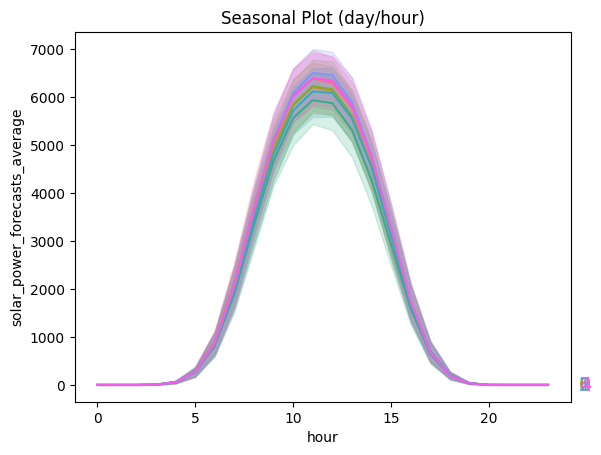

In [9]:
seasonal_plot(X_train, y='solar_power_forecasts_average', period="day", freq="hour")

<Axes: title={'center': 'Seasonal Plot (week/hour)'}, xlabel='hour', ylabel='solar_power_forecasts_average'>

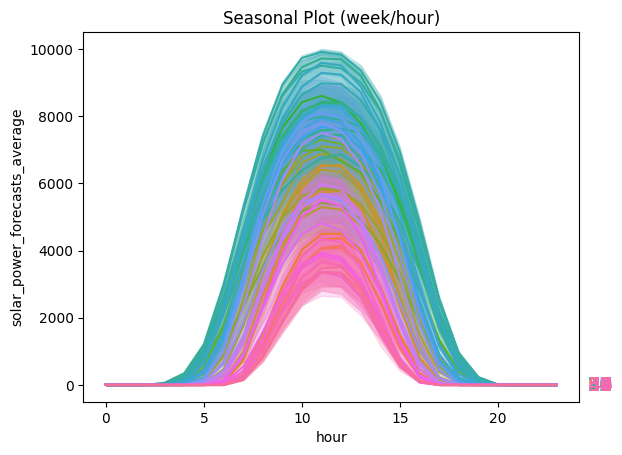

In [19]:
seasonal_plot(X_train, y='solar_power_forecasts_average', period="m", freq="hour")


<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

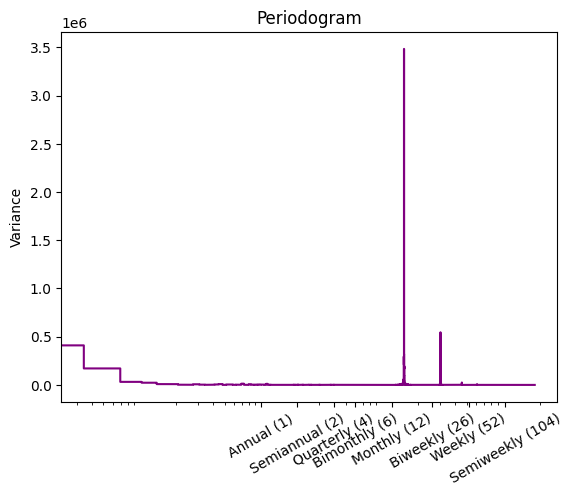

In [15]:
plot_periodogram(X_train['solar_power_forecasts_average'].fillna(0))